Import Libraries and dependencies

In [3]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [44 lines of output]
      Traceback (most recent call last):
        File "/opt/homebrew/anaconda3/lib/python3.12/site-packages/packaging/requirements.py", line 36, in __init__
          parsed = _parse_requirement(requirement_string)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/opt/homebrew/anaconda3/lib/python3.12/site-packages/packaging/_parser.py", line 62, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/opt/homebrew/anaconda3/lib/python3.12/site-packages/packaging/_parser.py", line 80, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
                          

In [ ]:
%pip install opencv-python mediapipe scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


: 

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

2) Keypoint using MP Holistic

In [9]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [8]:
# first funtion
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #color conversion to RGB
    image.flags.writeable = False   # image is no longer writeable
    results = model.process(image)  # Make prediction
    image.flags.writeable = True    # image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #color conversion to BGR
    return image, results

In [7]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [6]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                              )
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                              )
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                              )
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                              )

In [ ]:
cap = cv2.VideoCapture(1)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed(rendering)
        ret, frame = cap.read()

        # make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # draw landmarks
        draw_landmarks(image, results)

        # Show on Screen
        cv2.imshow('OpenCV Feed', image)
        
        # when to break
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [ ]:
len(results.face_landmarks.landmark)

In [ ]:
results

In [14]:
draw_landmarks(frame, results)

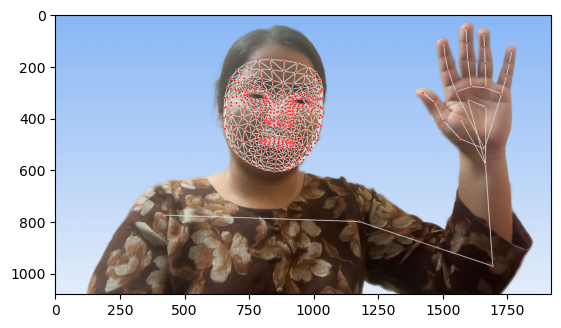

In [15]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

3. Extract Key Point values

In [16]:
results.pose_landmarks.landmark[0].z

-0.9962205290794373

In [ ]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [ ]:
#the above loop is converted into singel line for each type of landmark
#if statement -> to handle zero mark situation
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [19]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [4]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [ ]:
result_test = extract_keypoints(results)

In [23]:
result_test.shape

(1662,)

In [24]:
result_test

array([ 0.44760257,  0.35017574, -0.99622053, ...,  0.        ,
        0.        ,  0.        ])

In [25]:
468*3+33*4+21*3+21*3

1662

In [ ]:
np.save('0', result_test)

In [27]:
np.load('0.npy')

array([ 0.44760257,  0.35017574, -0.99622053, ...,  0.        ,
        0.        ,  0.        ])

4. Folders for data collection and collecting key points

In [11]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','me','father','mother','yes','no','help','please','what','again','more','go to', 'fine','eat','friend','name','nice','meet you','learn','sign','you','sorry'])

# Thirty videos worth of data
no_sequences = 200

# Videos are going to be 30 frames in length 
sequence_length = 30

In [ ]:
# Choose the specific action we want to collect data for
specific_action = 'sorry'  

# Create directories just for the specific action
for sequence in range(no_sequences):
    try: 
        os.makedirs(os.path.join(DATA_PATH, specific_action, str(sequence)))
    except:
        pass

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")

# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # Loop through sequences aka videos just for the specific action
    for sequence in range(no_sequences):
        # Loop through video length aka sequence length
        for frame_num in range(sequence_length):

            # Read feed
            ret, frame = cap.read()

            # Make detections
            image, results = mediapipe_detection(frame, holistic)

            # Draw landmarks
            draw_styled_landmarks(image, results)
            
            # Apply wait logic
            if frame_num == 0: 
                cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                cv2.putText(image, f'Collecting frames for {specific_action} Video Number {sequence}', (15,12), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                # Show to screen
                cv2.imshow('OpenCV Feed', image)
                cv2.waitKey(2000)
            else: 
                cv2.putText(image, f'Collecting frames for {specific_action} Video Number {sequence}', (15,12), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                # Show to screen
                cv2.imshow('OpenCV Feed', image)
            
            # Export keypoints
            keypoints = extract_keypoints(results)
            npy_path = os.path.join(DATA_PATH, specific_action, str(sequence), str(frame_num))
            np.save(npy_path, keypoints)

            # Break gracefully
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
                    
cap.release()
cv2.destroyAllWindows()

I0000 00:00:1745442043.464287  888123 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
W0000 00:00:1745442043.565073 1384636 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745442043.581198 1384636 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745442043.584064 1384635 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745442043.584140 1384640 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745442043.585837 1384636 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support 

5. Preprocess Data & create labels and features

In [2]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [12]:
label_map = {label:num for num, label in enumerate(actions)}

In [13]:
label_map

{'hello': 0,
 'thanks': 1,
 'iloveyou': 2,
 'A': 3,
 'B': 4,
 'C': 5,
 'D': 6,
 'E': 7,
 'F': 8,
 'G': 9,
 'H': 10,
 'I': 11,
 'J': 12,
 'K': 13,
 'L': 14,
 'M': 15,
 'N': 16,
 'O': 17,
 'P': 18,
 'Q': 19,
 'R': 20,
 'S': 21,
 'T': 22,
 'U': 23,
 'V': 24,
 'W': 25,
 'X': 26,
 'Y': 27,
 'Z': 28,
 'me': 29,
 'father': 30,
 'mother': 31,
 'yes': 32,
 'no': 33,
 'help': 34,
 'please': 35,
 'what': 36,
 'again': 37,
 'more': 38,
 'go to': 39,
 'fine': 40,
 'eat': 41,
 'friend': 42,
 'name': 43,
 'nice': 44,
 'meet you': 45,
 'learn': 46,
 'sign': 47,
 'you': 48,
 'sorry': 49}

In [14]:
sequences, labels = [], []
# sequences: A list where each element is a sequence (window) of frames (each frame is a numpy array)
# labels: A list where each element is the label for the corresponding sequence in sequences

for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [67]:
np.array(sequences).shape
# (50*200 = 10000 videos , 30 frames each, each one has 1662 different key points)

(10000, 30, 1662)

In [68]:
np.array(labels).shape

(10000,)

In [15]:
X = np.array(sequences)
# x axis values are sequences

In [70]:
X.shape

(10000, 30, 1662)

In [16]:
y = to_categorical(labels).astype(int)
# y axis values are labels as binary flags

In [72]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

#--------------------------------------------------------------------------------------------------

# Load your data (X: features, y: labels)
# X = np.load("keypoints.npy")  # Shape: (10000, 30, 1662)
# y = np.load("labels.npy")     # Shape: (10000,)

# # Step 1: Split into train (70%) and temp (30%)
# X_train, X_temp, y_train, y_temp = train_test_split(
#     X, y, test_size=0.3, stratify=y, random_state=42
# )

# # Step 2: Split temp into validation (15%) and test (15%)
# X_val, X_test, y_val, y_test = train_test_split(
#     X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
# )

# print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")

In [18]:
X_test.shape

(3000, 30, 1662)

6. Train LSTM neural network

In [19]:
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization

In [20]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)
# early_stopping = EarlyStopping(monitor='val_loss', patience=10)
# checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

In [80]:
actions.shape[0]

50

In [ ]:
model = Sequential()
#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
# we have added 3 sets of LSTM layers for temporal modeling
model.add(LSTM(128, return_sequences=True, activation='relu', input_shape=(30,1662))) #64 lstm units
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(256, return_sequences=True, activation='relu')) #128 lstm units 
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(LSTM(128, return_sequences=False, activation='relu')) #64 lstm units
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Dense layers for classification
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(actions.shape[0], activation='softmax'))

/opt/homebrew/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [82]:
res = [0.3, 0.2, 0.1, 0.7, 0.62,0.45, 0.55, 0.73, 0.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.9]

In [83]:
actions[np.argmax(res)]

'go to'

In [22]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [23]:
# Training parameters
EPOCHS = 100
BATCH_SIZE = 32 

In [ ]:
# Data Preparation
# normalize keypoints
# import random
# from scipy.ndimage import rotate


# X_train = X_train / np.max(X_train)  # Simple normalization
# X_val = X_val / np.max(X_val)
# X_test = X_test / np.max(X_test)

# # Data augmentation function
# def augment_sequence(sequence):
#     """
#     Augments a sequence of keypoints (30 frames, 1662 keypoints)
#     with random transformations that maintain sign language semantics
#     """
#     augmented = sequence.copy()
    
#     # Random scaling (90-110%)
#     scale = np.random.uniform(0.9, 1.1)
#     augmented = augmented * scale
    
#     # Random translation (-10 to 10 pixels in x/y)
#     translation = np.random.uniform(-10, 10, size=(1, 1662))
#     augmented += translation
    
#     # Random noise
#     noise = np.random.normal(0, 0.01, augmented.shape)
#     augmented += noise
    
#     return augmented

# def data_generator(X, y, batch_size=32, augment=False):
#     while True:
#         indices = np.random.permutation(len(X))
#         for i in range(0, len(X), batch_size):
#             batch_indices = indices[i:i+batch_size]
#             batch_X = X[batch_indices]
#             batch_y = y[batch_indices]
            
#             if augment:
#                 batch_X = np.array([augment_sequence(seq) for seq in batch_X])
            
#             yield batch_X, batch_y

In [24]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train.reshape(-1, 30*1662)).reshape(-1, 30, 1662)
# X_test = scaler.transform(X_test.reshape(-1, 30*1662)).reshape(-1, 30, 1662)
model.fit(X_train, y_train,epochs=EPOCHS,batch_size=BATCH_SIZE, callbacks=[tb_callback])

#---------------------------------------------------------------------------------------------------

# Train the model
# Calculate steps per epoch
# train_steps = len(X_train) // BATCH_SIZE
# val_steps = len(X_val) // BATCH_SIZE

# # Train with augmentation
# history = model.fit(
#     data_generator(X_train, y_train, batch_size=BATCH_SIZE, augment=True),
#     steps_per_epoch=train_steps,
#     validation_data=data_generator(X_val, y_val, batch_size=BATCH_SIZE),
#     validation_steps=val_steps,
#     epochs=EPOCHS,
#     callbacks=[tb_callback, early_stopping, checkpoint]
# )

# # Evaluate the model
# test_loss, test_acc = model.evaluate(X_test, y_test)
# print(f'Test accuracy: {test_acc:.4f}')

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 22s 79ms/step - categorical_accuracy: 0.0239 - loss: 3.9877
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - categorical_accuracy: 0.0624 - loss: 3.5186
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 18s 84ms/step - categorical_accuracy: 0.1184 - loss: 2.9753
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - categorical_accuracy: 0.1574 - loss: 2.7487
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 18s 84ms/step - categorical_accuracy: 0.1900 - loss: 2.6044
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - categorical_accuracy: 0.2157 - loss: 2.4914
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - categorical_accuracy: 0.2305 - loss: 2.3779
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 19s 87ms/step - categorical_accuracy: 0.2512 - loss: 2.3121
Epoch 9/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 19s 84ms/step - categorical_accuracy: 0.2733 - loss: 2.2117
Epoch 10/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 19s 85ms/step - categorical_accuracy: 0.2960 - lo

KeyboardInterrupt: 

In [33]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 51)             │         1,683 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,794,779 (6.85 MB)

 Trainable params: 598,259 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,196,520 (4.56 MB)

In [ ]:
# plt.plot(history.history['accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train'], loc = 'upper left')
# plt.show()

7. predictions

In [ ]:
res = model.predict(X_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step


In [30]:
res

array([[4.08303365e-02, 4.03361395e-02, 5.98502345e-02, ...,
        2.30218703e-03, 1.68920215e-03, 1.52170667e-02],
       [1.66886337e-02, 4.91832495e-02, 4.14417349e-02, ...,
        2.78434134e-03, 4.84751276e-04, 5.55829741e-02],
       [1.25835005e-08, 3.23751033e-03, 4.59699066e-07, ...,
        1.03268646e-01, 4.00460976e-07, 1.50004285e-03],
       ...,
       [4.02548909e-02, 4.15170565e-02, 5.95235601e-02, ...,
        2.42108107e-03, 1.65141246e-03, 1.61567610e-02],
       [3.98022821e-05, 1.90995187e-02, 2.97127117e-04, ...,
        8.12119693e-02, 1.00347315e-04, 2.47225724e-02],
       [1.45635894e-07, 5.51326526e-03, 2.83550412e-06, ...,
        1.13761768e-01, 2.45057322e-06, 2.59975903e-03]], dtype=float32)

In [27]:
np.argmax(res[4])

15

In [33]:
actions[np.argmax(res[4])]

'M'

In [34]:
actions[np.argmax(y_test[4])]

'O'

8. Save weights

In [30]:
model.save('action.h5')